**Kelompok 5:**
* Cintiya Agustin Nareswari (24031554218)
* Ayda Syifa Ul Aliyah (1314623064)

ANALISIS HUBUNGAN ANTARA LUAS LAHAN PERTANIAN, PRODUKSI PANGAN DAN KETERSEDIAAN KALORI PER KAPITA DI DELAPAN NEGARA ASIA TENGGARA TAHUN 2000-2021

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker


Load Data

In [ ]:
AGR = pd.read_csv('/content/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5884.csv', skiprows=4)
CAL = pd.read_csv('/content/daily-per-capita-caloric-supply.csv')
WFP = pd.read_csv('/content/world food production.csv')


In [ ]:
AGR.info()
AGR.describe()
AGR.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            225 non-null    float64
 6   1962            225 non-null    float64
 7   1963            225 non-null    float64
 8   1964            225 non-null    float64
 9   1965            225 non-null    float64
 10  1966            225 non-null    float64
 11  1967            225 non-null    float64
 12  1968            225 non-null    float64
 13  1969            225 non-null    float64
 14  1970            225 non-null    float64
 15  1971            225 non-null    float64
 16  1972            225 non-null    float64
 17  1973            225 non-null    flo

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,40.488452,40.419080,40.445541,40.413811,40.350578,...,46.161669,46.246059,46.369558,46.419179,46.456976,46.510566,46.541210,NaN,NaN,NaN
2,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.878356,57.955016,58.031676,58.116002,58.123668,...,58.123668,58.123668,58.276988,58.276988,58.741548,58.741548,58.741548,58.439508,NaN,NaN
3,Africa Western and Central,AFW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,32.906467,32.948239,32.993103,33.030779,33.077906,...,40.300093,40.475867,40.804327,40.948870,41.120326,41.373999,41.432820,NaN,NaN,NaN
4,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,36.237266,36.243683,36.241277,36.247694,36.245288,...,36.756236,36.708912,36.719339,36.781904,36.788321,36.830833,36.947140,36.947943,NaN,NaN


In [ ]:
AGR = pd.read_csv('/content/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5884.csv', skiprows=4)
AGR.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,40.488452,40.419080,40.445541,40.413811,40.350578,...,46.161669,46.246059,46.369558,46.419179,46.456976,46.510566,46.541210,NaN,NaN,NaN
2,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.878356,57.955016,58.031676,58.116002,58.123668,...,58.123668,58.123668,58.276988,58.276988,58.741548,58.741548,58.741548,58.439508,NaN,NaN
3,Africa Western and Central,AFW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,32.906467,32.948239,32.993103,33.030779,33.077906,...,40.300093,40.475867,40.804327,40.948870,41.120326,41.373999,41.432820,NaN,NaN,NaN
4,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,36.237266,36.243683,36.241277,36.247694,36.245288,...,36.756236,36.708912,36.719339,36.781904,36.788321,36.830833,36.947140,36.947943,NaN,NaN


DATA CLEANING AGR

In [ ]:
AGR = AGR.rename(columns={'Country Name': 'Nama Negara','Country Code': 'Kode Negara',
    'Year': 'Tahun','Value': 'Luas_Lahan_Pertanian_%'})

AGR['Nama Negara'] = AGR['Nama Negara'].replace({"Viet Nam": "Vietnam","Timor-Leste": "Timor Leste",
    "Lao PDR" : "Laos", "Cambodia": "Kamboja","Philippines": "Filipina"})

negara = ['Indonesia','Kamboja','Myanmar','Malaysia','Filipina','Thailand','Timor Leste','Vietnam']

AGR = AGR[AGR['Nama Negara'].isin(negara)]
tahun_cols = [str(y) for y in range(1960, 2025)]

AGR = AGR.melt(
    id_vars=['Nama Negara','Kode Negara'],
    value_vars=tahun_cols,
    var_name='Tahun',
    value_name='Luas_Lahan_Pertanian_%')

AGR['Tahun'] = pd.to_numeric(AGR['Tahun'], errors='coerce')

AGR = AGR[(AGR['Tahun'] >= 2000) & (AGR['Tahun'] <= 2021)]

AGR = AGR.dropna(subset=['Luas_Lahan_Pertanian_%'])

AGR = AGR.sort_values(by=['Tahun', 'Nama Negara'])
AGR.to_csv("AGR_clean.csv", index=False)

AGR.head()

,Nama Negara,Kode Negara,Tahun,Luas_Lahan_Pertanian_%
324,Filipina,PHL,2000,37.676493
320,Indonesia,IDN,2000,23.764340
321,Kamboja,KHM,2000,27.022434
323,Malaysia,MYS,2000,21.119160
322,Myanmar,MMR,2000,16.543746


In [ ]:
CAL = pd.read_csv('/content/daily-per-capita-caloric-supply.csv')
CAL.head()

,Entity,Code,Year,Daily calorie supply per person
0,Afghanistan,AFG,1961,2914.3484
1,Afghanistan,AFG,1962,2835.6074
2,Afghanistan,AFG,1963,2623.7017
3,Afghanistan,AFG,1964,2872.5679
4,Afghanistan,AFG,1965,2876.1790


DATA CLEANING CAL

In [ ]:
CAL = CAL.rename(columns={"Entity": "Nama Negara","Code": "Kode Negara",
    "Year": "Tahun","Daily calorie supply per person": "Kalori_per_Kapita",})
CAL["Nama Negara"] = CAL["Nama Negara"].replace({"Cambodia": "Kamboja", "Philippines": "Filipina",
                                                 "East Timor": "Timor Leste"})

negara = ["Indonesia", "Kamboja", "Myanmar", "Malaysia","Filipina", "Thailand", "Timor Leste", "Vietnam"]

CAL = CAL[CAL["Nama Negara"].isin(negara)]
CAL = CAL[(CAL["Tahun"] >= 2000) & (CAL["Tahun"] <= 2021)]
CAL = CAL.dropna()
CAL = CAL.sort_values(by=["Tahun", "Nama Negara"])
CAL = CAL[["Nama Negara", "Kode Negara", "Tahun", "Kalori_per_Kapita"]]

CAL.to_csv("Kalori_clean.csv", index=False)

CAL.head()


,Nama Negara,Kode Negara,Tahun,Kalori_per_Kapita
9395,Filipina,PHL,2000,2332.7178
5419,Indonesia,IDN,2000,2355.5193
1793,Kamboja,KHM,2000,2074.3809
7082,Malaysia,MYS,2000,2897.0564
7889,Myanmar,MMR,2000,2043.3538


DATA CLEANING WFP

In [ ]:
WFP = pd.read_csv('/content/world food production.csv')
WFP.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


In [ ]:
WFP = WFP.rename(columns={
    "Entity": "Nama Negara",
    "Year": "Tahun",
    "Maize Production (tonnes)": "Produksi_Jagung_(ton)",
    "Rice  Production ( tonnes)": "Produksi_Beras_(ton)",
    "Palm oil  Production (tonnes)": "Produksi_Minyak_Sawit_(ton)",
    "Coffee, green Production ( tonnes)": "Produksi_Kopi_(ton)",
    "Cocoa beans Production (tonnes)": "Produksi_Kakao_(ton)",
    "Tea  Production ( tonnes )": "Produksi_Teh_(ton)",
    "Sweet potatoes  Production (tonnes)": "Produksi_Ubi_Jalar_(ton)"})

WFP["Nama Negara"] = WFP["Nama Negara"].replace({
    "Cambodia": "Kamboja",
    "Philippines": "Filipina",
    "East Timor": "Timor Leste"})

negara = ["Indonesia", "Kamboja", "Myanmar", "Malaysia","Filipina", "Thailand", "Timor Leste", "Vietnam"]

WFP = WFP[WFP["Nama Negara"].isin(negara)]
WFP = WFP[(WFP["Tahun"] >= 2000) & (WFP["Tahun"] <= 2021)]
kolom_produksi = ["Nama Negara", "Tahun","Produksi_Jagung_(ton)", "Produksi_Beras_(ton)", "Produksi_Minyak_Sawit_(ton)",
                  "Produksi_Kopi_(ton)","Produksi_Kakao_(ton)", "Produksi_Teh_(ton)", "Produksi_Ubi_Jalar_(ton)"]

WFP = WFP[kolom_produksi]
produksi_cols = [
    "Produksi_Jagung_(ton)", "Produksi_Beras_(ton)", "Produksi_Minyak_Sawit_(ton)", "Produksi_Kopi_(ton)",
    "Produksi_Kakao_(ton)", "Produksi_Teh_(ton)", "Produksi_Ubi_Jalar_(ton)"]

WFP[produksi_cols] = WFP[produksi_cols].fillna(0)
WFP = WFP.sort_values(by=["Tahun", "Nama Negara"]).reset_index(drop=True)
WFP.to_csv("WFP_clean.csv", index=False)

WFP.head(20)


,Nama Negara,Tahun,Produksi_Jagung_(ton),Produksi_Beras_(ton),Produksi_Minyak_Sawit_(ton),Produksi_Kopi_(ton),Produksi_Kakao_(ton),Produksi_Teh_(ton),Produksi_Ubi_Jalar_(ton)
0,Filipina,2000,4511104.0,1.467138e+06,248424.600,640614.208,315480.018,3592.4,5.805530e+05
1,Indonesia,2000,9677000.0,1.705478e+08,43284.400,12927.000,829075.940,612824.4,5.486503e+05
2,Kamboja,2000,156972.0,8.044000e+04,0.000,8000.000,15.000,270.0,1.125517e+08
3,Malaysia,2000,65000.0,6.933328e+06,17045.200,2200.000,6520.000,992570.2,2.921160e+05
4,Myanmar,2000,358900.0,6.028100e+04,24800.000,669947.400,1613.200,635747.4,8.348530e+05
5,Thailand,2000,4472903.0,6.783328e+07,93600.000,420929.424,110589.800,645123.4,3.452486e+07
6,Timor Leste,2000,88449.0,2.222693e+06,3700.000,58300.000,33.060,5182.6,3.000000e+03
7,Vietnam,2000,2005900.0,2.096000e+05,149523.552,84341.600,122788.600,4383.0,0.000000e+00
8,Filipina,2001,4525012.0,1.558048e+06,866277.400,881.000,965213.600,837345.2,7.208040e+05
9,Indonesia,2001,9347200.0,1.547296e+08,40400.000,12701.000,828252.900,130440.8,5.213269e+05


INTEGRASI AGR, CAL, WFP


In [ ]:
DATA = pd.merge(AGR, CAL, on=["Nama Negara", "Kode Negara", "Tahun"], how="outer")
DATA = pd.merge(DATA, WFP, on=["Nama Negara", "Tahun"], how="outer")
DATA = DATA.groupby("Nama Negara").apply(lambda g: g.fillna(g.median(numeric_only=True))).reset_index(drop=True)
DATA = DATA.fillna(DATA.median(numeric_only=True))
DATA = DATA.sort_values(by=["Tahun", "Nama Negara"])
DATA.to_csv("DATA_INTEGRASI_FINAL.csv", index=False)
DATA.head()


/tmp/ipython-input-2821822090.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  DATA = DATA.groupby("Nama Negara").apply(lambda g: g.fillna(g.median(numeric_only=True))).reset_index(drop=True)


,Nama Negara,Kode Negara,Tahun,Luas_Lahan_Pertanian_%,Kalori_per_Kapita,Produksi_Jagung_(ton),Produksi_Beras_(ton),Produksi_Minyak_Sawit_(ton),Produksi_Kopi_(ton),Produksi_Kakao_(ton),Produksi_Teh_(ton),Produksi_Ubi_Jalar_(ton)
0,Filipina,PHL,2000,37.676493,2332.7178,4511104.0,1467138.0,248424.6,640614.208,315480.018,3592.4,580553.0
22,Indonesia,IDN,2000,23.764340,2355.5193,9677000.0,170547800.0,43284.4,12927.000,829075.940,612824.4,548650.3
44,Kamboja,KHM,2000,27.022434,2074.3809,156972.0,80440.0,0.0,8000.000,15.000,270.0,112551736.0
66,Malaysia,MYS,2000,21.119160,2897.0564,65000.0,6933328.5,17045.2,2200.000,6520.000,992570.2,292116.0
88,Myanmar,MMR,2000,16.543746,2043.3538,358900.0,60281.0,24800.0,669947.400,1613.200,635747.4,834853.0


# ANALISIS DATA EKSPLORATIF

Mendefinisikan id_cols dan num_cols

In [ ]:
id_cols = ['Nama Negara', 'Kode Negara', 'Tahun']

num_cols = [
    'Luas_Lahan_Pertanian_%','Kalori_per_Kapita',
    'Produksi_Jagung_(ton)', 'Produksi_Beras_(ton)',
    'Produksi_Minyak_Sawit_(ton)', 'Produksi_Kopi_(ton)',
    'Produksi_Kakao_(ton)', 'Produksi_Teh_(ton)',
    'Produksi_Ubi_Jalar_(ton)'
]

##STATISTIK DESKRIPTIF

In [ ]:
DATA.describe()

,Tahun,Luas_Lahan_Pertanian_%,Kalori_per_Kapita,Produksi_Jagung_(ton),Produksi_Beras_(ton),Produksi_Minyak_Sawit_(ton),Produksi_Kopi_(ton),Produksi_Kakao_(ton),Produksi_Teh_(ton),Produksi_Ubi_Jalar_(ton)
count,176.000000,176.000000,176.000000,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02
mean,2010.500000,30.216631,2579.032480,4.365916e+06,3.429119e+07,2.045826e+05,4.322401e+05,4.991578e+05,2.987665e+05,1.770796e+07
std,6.362389,8.681939,251.854502,5.839627e+06,7.900049e+07,9.764783e+05,8.432087e+05,6.962431e+05,3.548797e+05,3.775822e+07
min,2000.000000,16.543746,2043.353800,3.207500e+04,2.000000e+04,0.000000e+00,8.000000e+00,0.000000e+00,1.680000e+02,0.000000e+00
25%,2005.000000,22.767317,2372.804700,1.488954e+05,1.356500e+05,4.143000e+03,7.163950e+03,2.593350e+02,7.392800e+03,7.026900e+03
50%,2010.500000,28.368618,2636.319600,2.117091e+06,2.161936e+06,1.340200e+04,1.572249e+04,1.166892e+05,8.329040e+04,7.229645e+05
75%,2016.000000,38.741695,2798.975200,5.193799e+06,4.914542e+06,1.244800e+05,2.602419e+05,8.135850e+05,5.754110e+05,1.376652e+06
max,2021.000000,45.998160,3004.102800,3.025394e+07,3.186617e+08,1.132736e+07,3.563795e+06,3.314897e+06,1.079780e+06,1.315975e+08


## BARPLOT

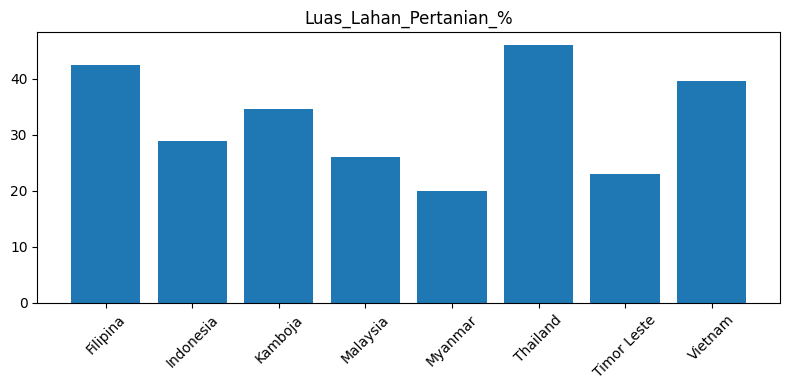

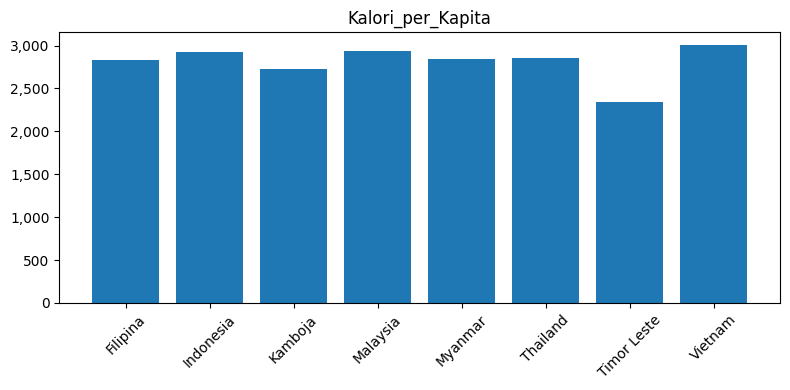

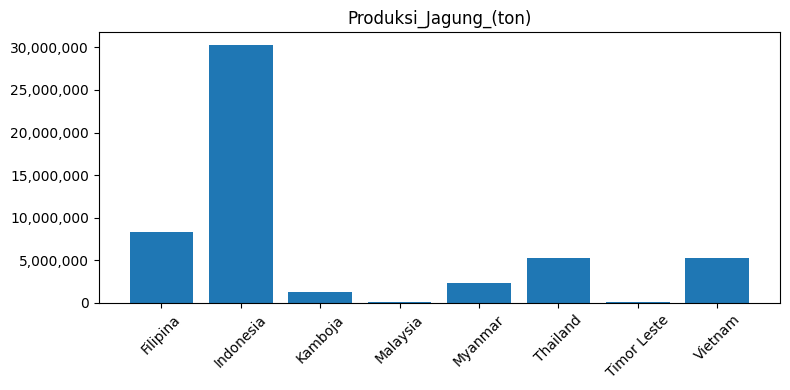

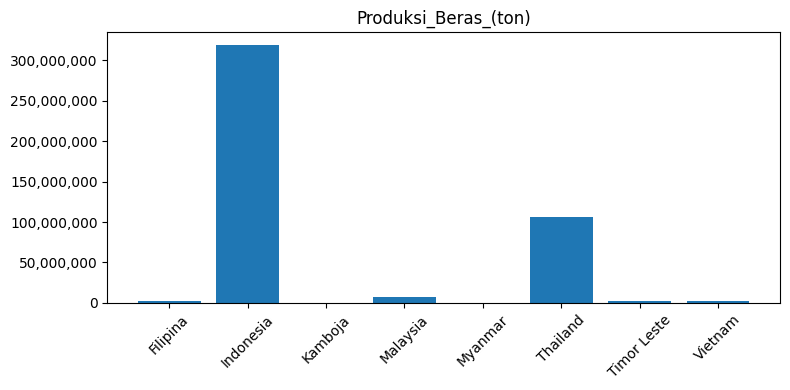

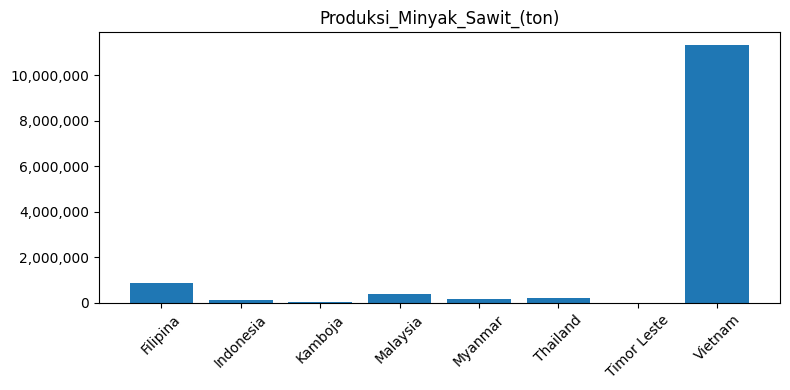

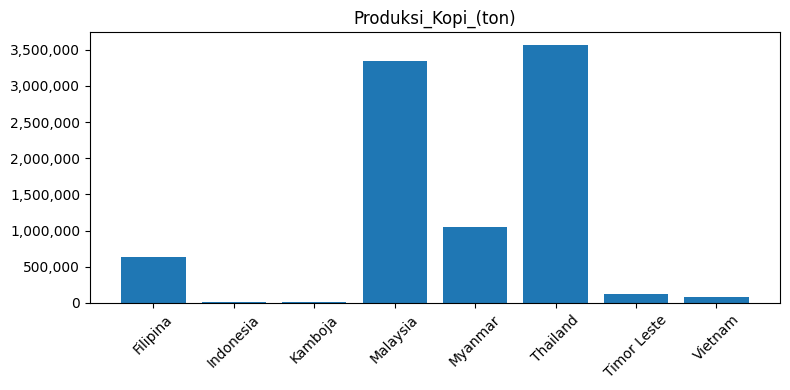

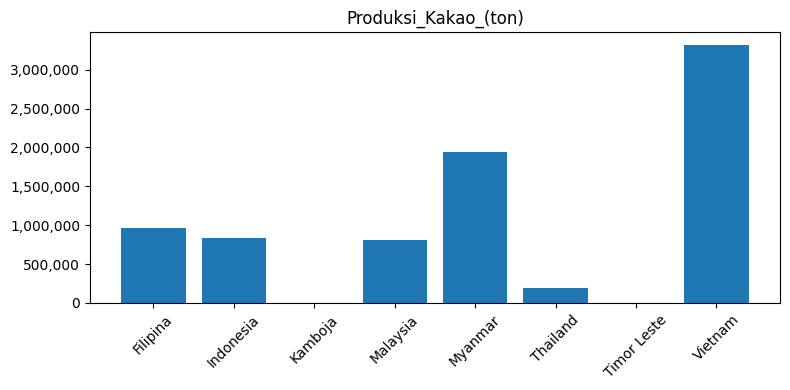

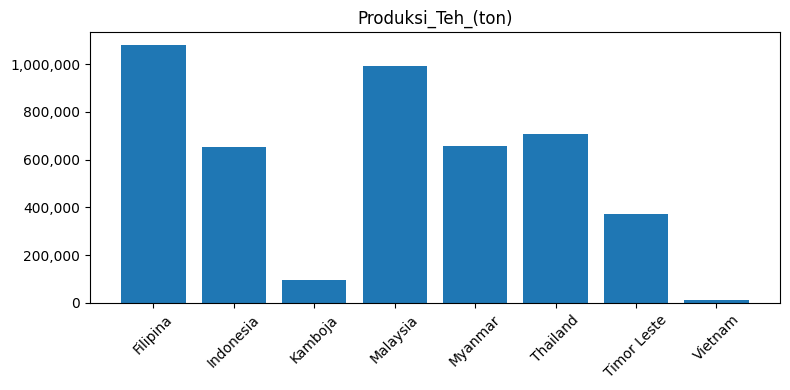

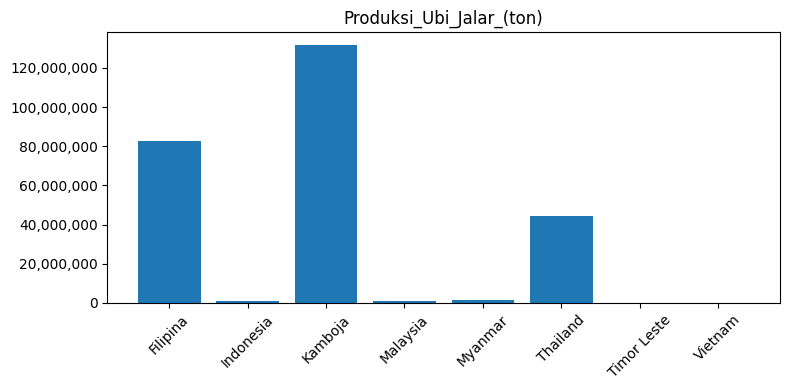

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    plt.bar(DATA["Nama Negara"], DATA[col])
    plt.xticks(rotation=45)
    plt.title(col)

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

    plt.tight_layout()
    plt.show()

## DENSITY PLOT

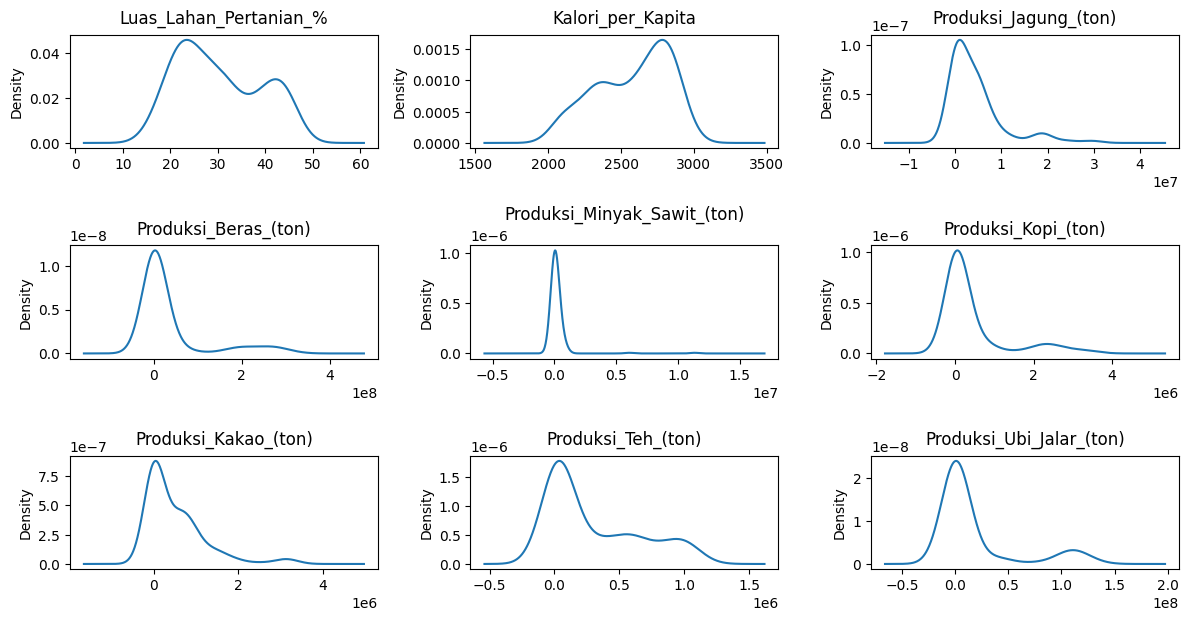

In [ ]:
n = len(num_cols)
rows = (n // 3) + 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    DATA[col].plot(kind='density', ax=axes[i])
    axes[i].set_title(col, pad=8)
    axes[i].grid(False)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## HISTOGRAM

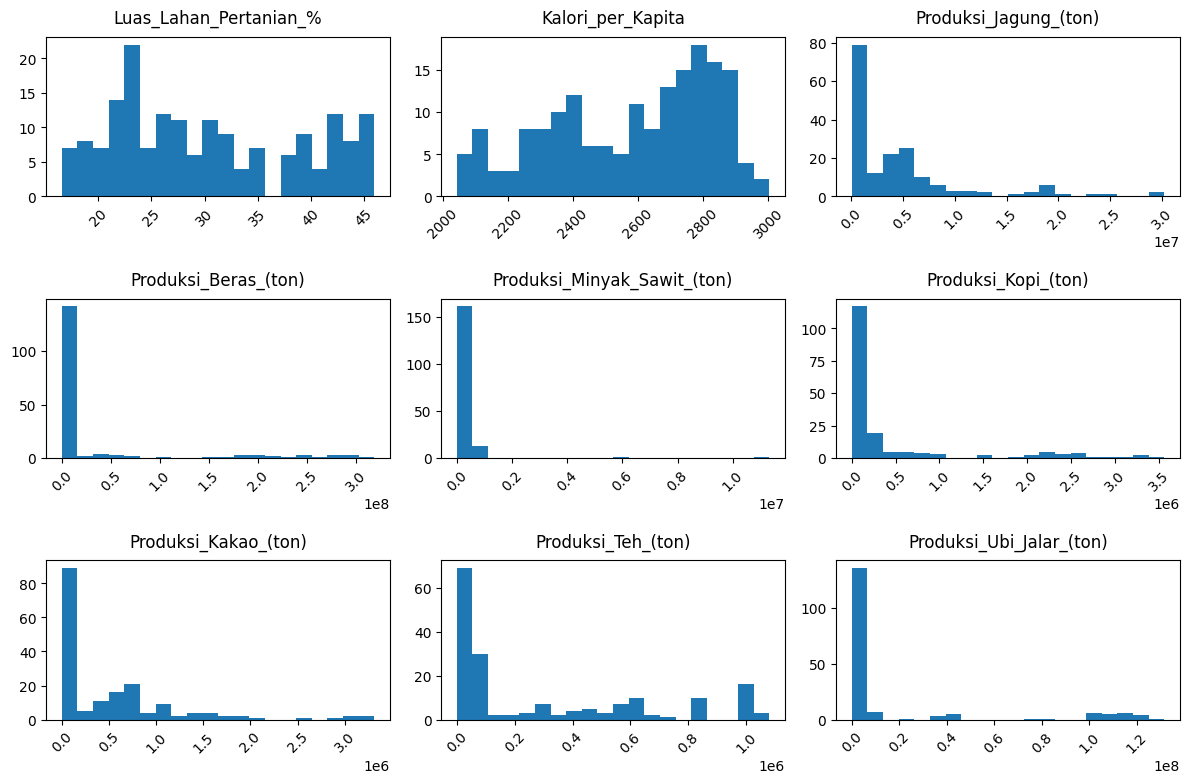

In [ ]:
axes = DATA[num_cols].hist(bins=20, figsize=(12, 8))

for ax in axes.flatten():
    ax.set_title(ax.get_title(), pad=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

plt.tight_layout()
plt.show()

## BOXPLOT

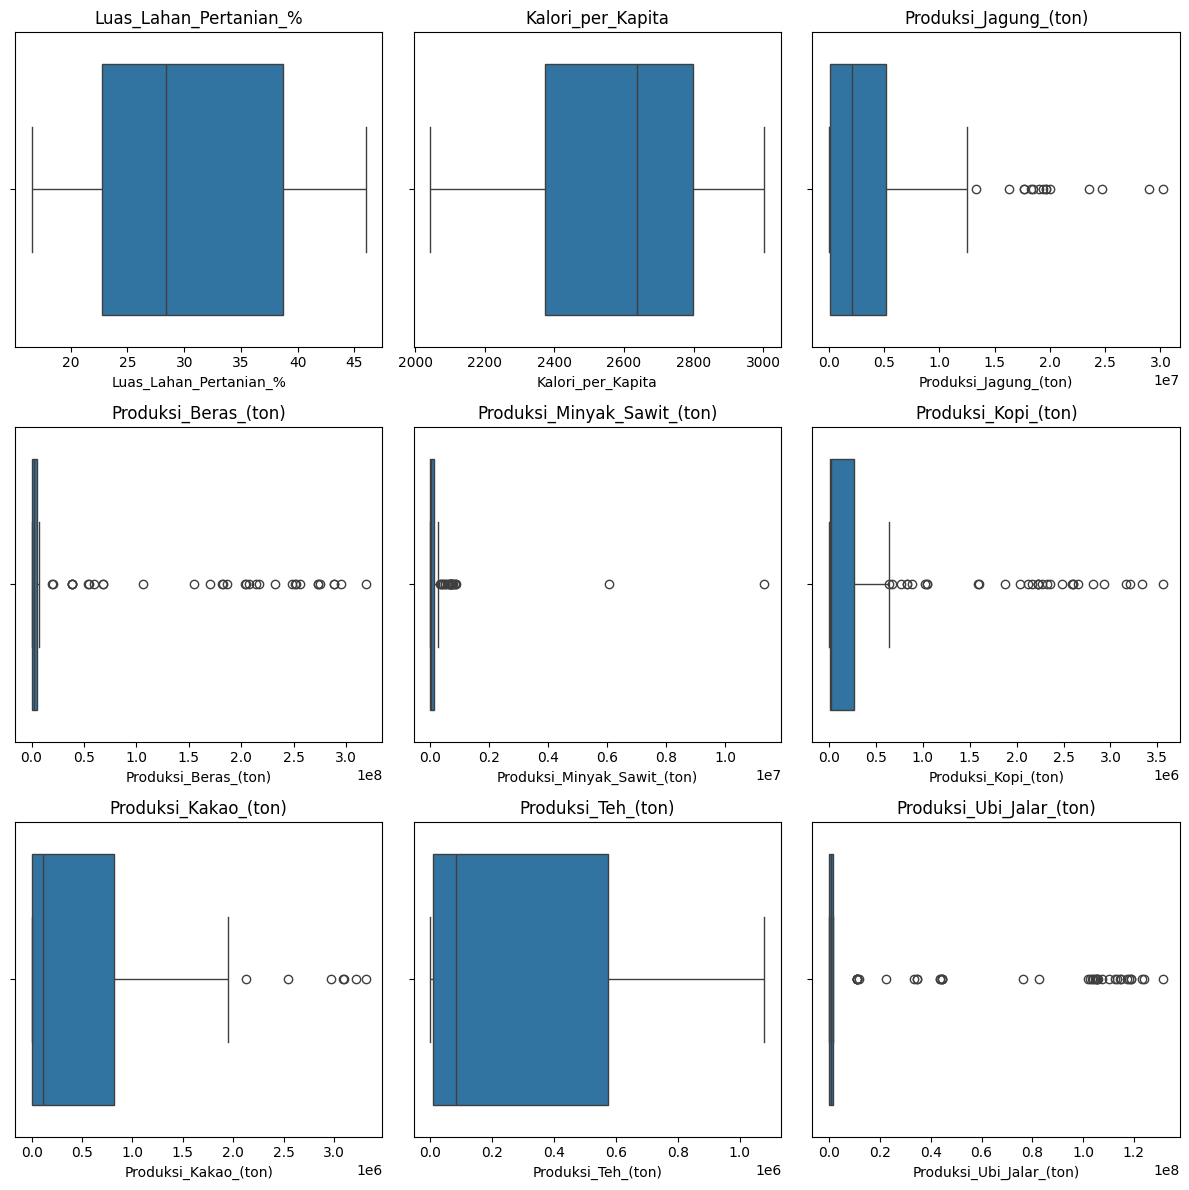

In [ ]:
plt.figure(figsize=(12, 4 * ((len(num_cols) + 2) // 3)))

for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 2) // 3, 3, i+1)
    sns.boxplot(x = DATA[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Q-Q PLOT

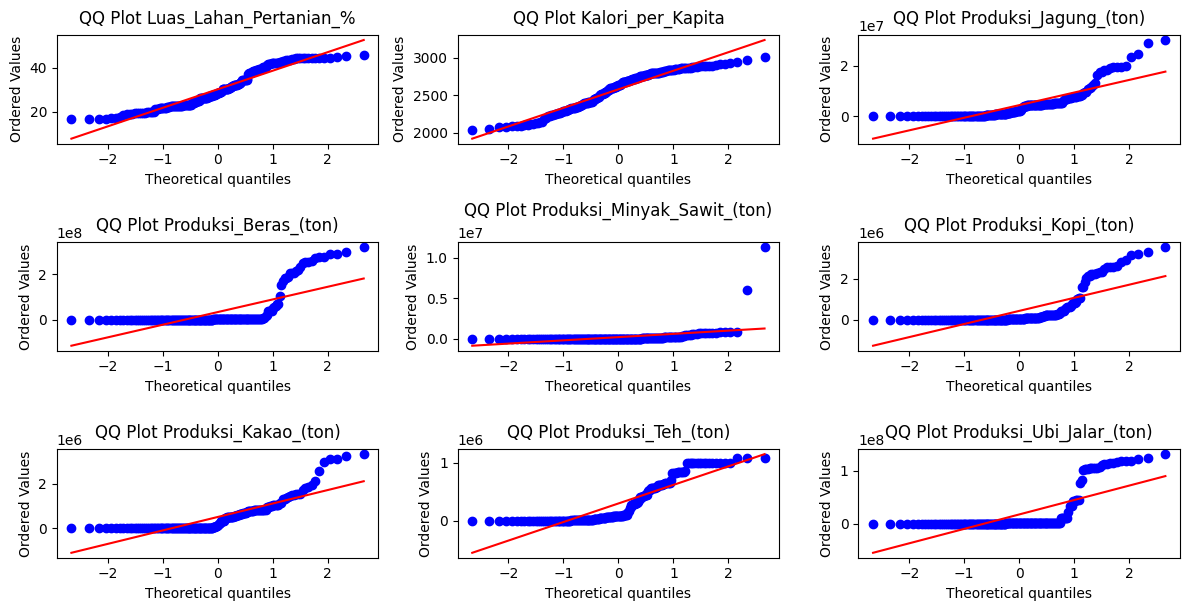

In [ ]:
import scipy.stats as stats

n = len(num_cols)
rows = (n // 3) + 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    stats.probplot(DATA[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'QQ Plot {col}', pad=8)
    axes[i].grid(False)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## GROUPING DAN AGREGASI

In [ ]:
output_file = "Ranking_Variabel.xlsx"

with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    for var in num_cols:
        df_rank = (
            DATA.groupby("Nama Negara")[var]
                .mean()
                .reset_index()
                .sort_values(var, ascending=False)
        )

        df_rank["Rank"] = range(1, len(df_rank) + 1)

        sheet_name = var.replace("(ton)", "").replace("%", "").replace(" ", "_")[0:30]
        df_rank.to_excel(writer, sheet_name=sheet_name, index=False)

## PIVOTING

In [ ]:
output_path = "pivot_per_variabel.xlsx"
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:

    for col in num_cols:
        pivot_df = DATA.pivot_table(
            index='Nama Negara',
            columns='Tahun',
            values=col
        )

        sheet_name = col.replace("(ton)", "").replace("%", "").replace(" ", "_")[0:31]
        pivot_df.to_excel(writer, sheet_name=sheet_name)

## LINEPLOT

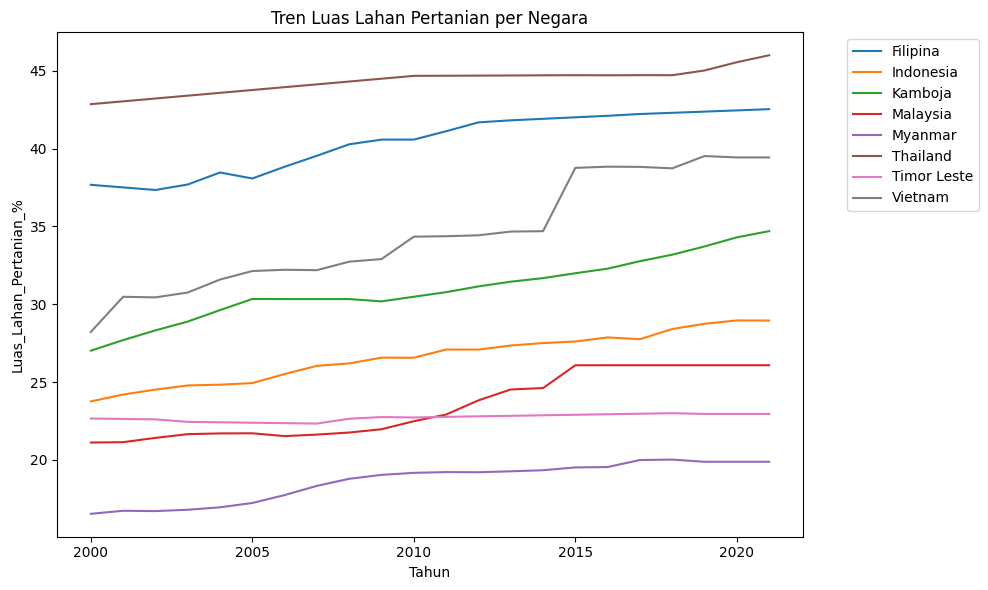

In [ ]:
#MELIHAT TREN LUAS LAHAN PERTANIAN TIAP NEGARA
plt.figure(figsize=(10,6))

sns.lineplot(
    data=DATA,
    x='Tahun',
    y='Luas_Lahan_Pertanian_%',
    hue='Nama Negara'
)

plt.title('Tren Luas Lahan Pertanian per Negara')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('tren_lahan.pdf', format='pdf')


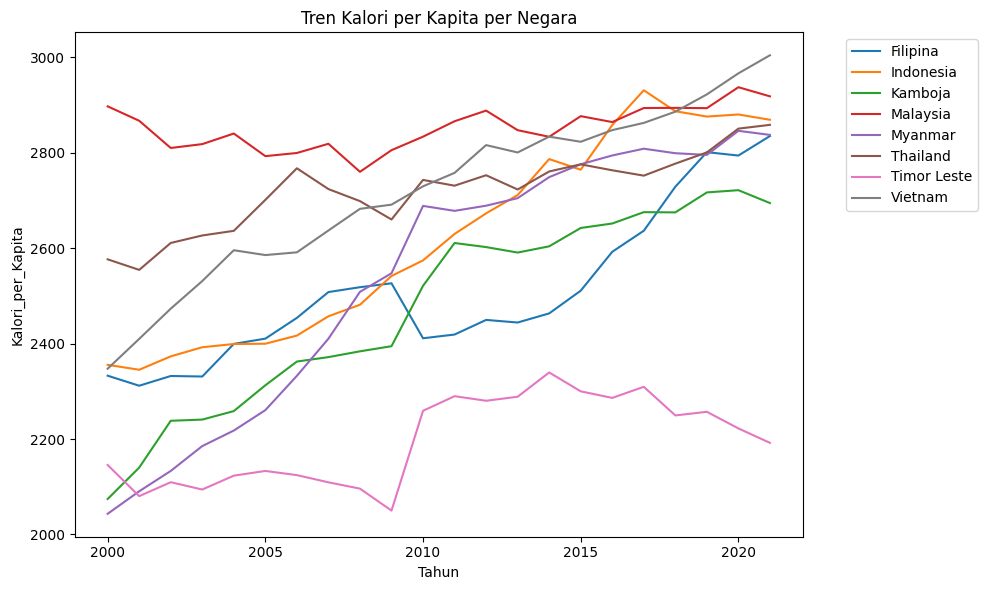

In [ ]:
#MELIHAT TREN KALORI PER KAPITA TIAP NEGARA
plt.figure(figsize=(10,6))

sns.lineplot(
    data=DATA,
    x='Tahun',
    y='Kalori_per_Kapita',
    hue='Nama Negara'
)

plt.title('Tren Kalori per Kapita per Negara')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('tren_kalori.pdf', format='pdf')

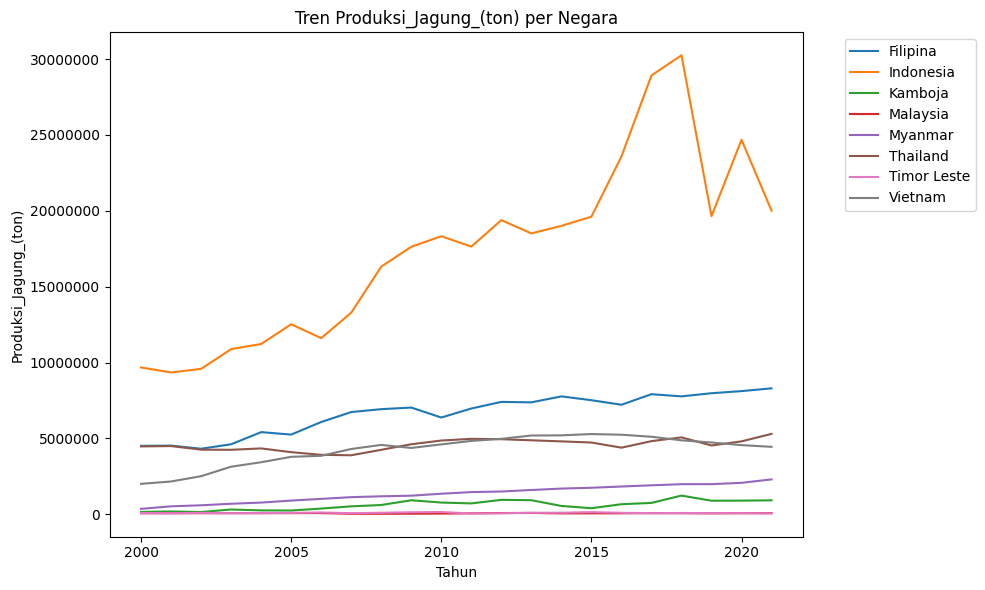

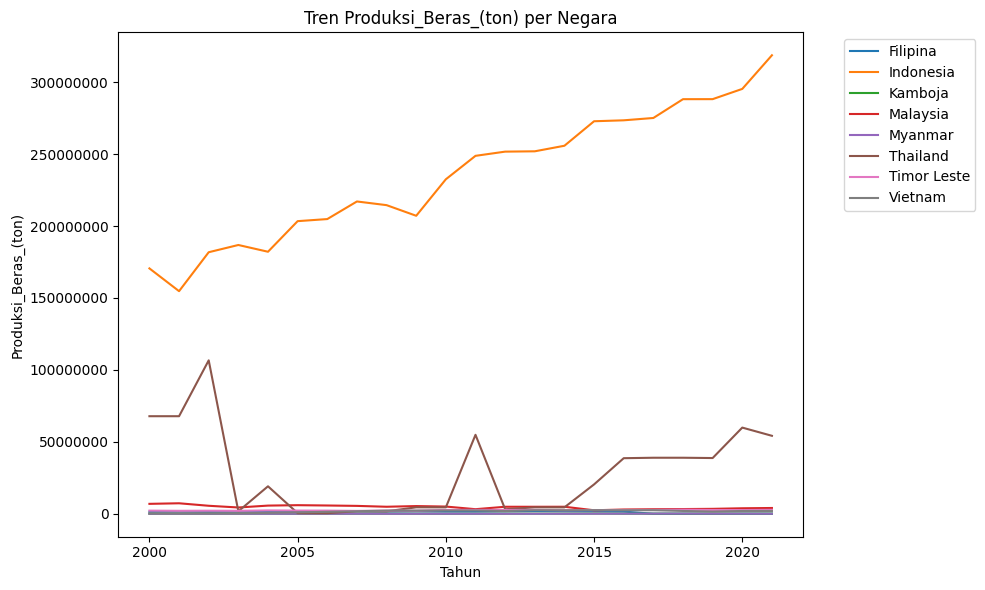

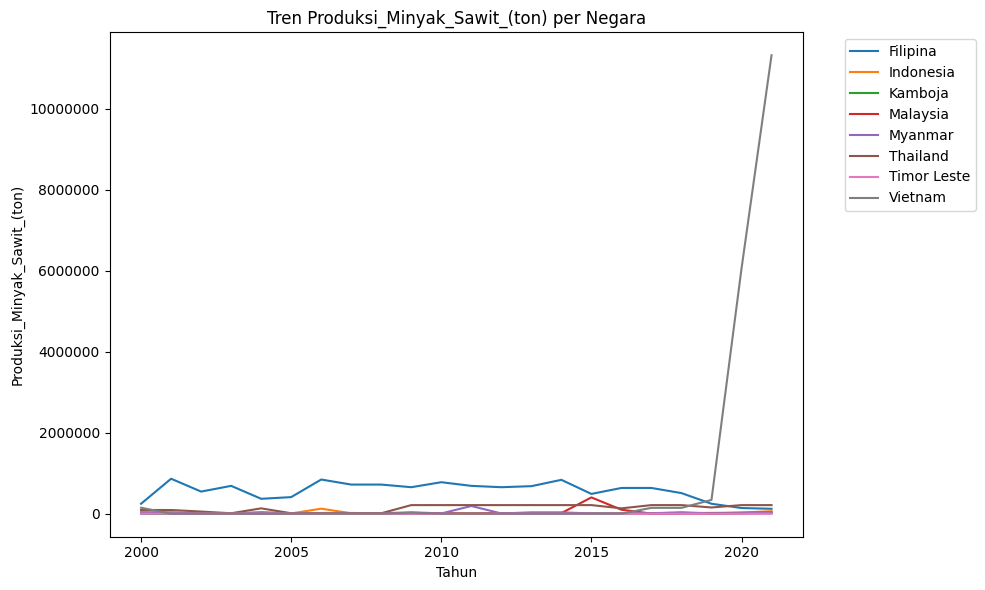

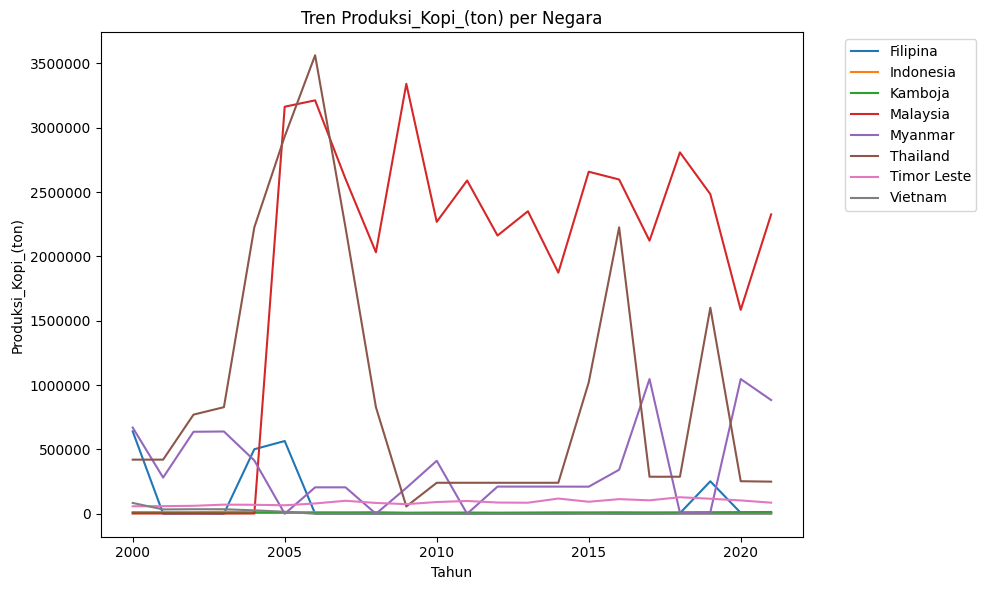

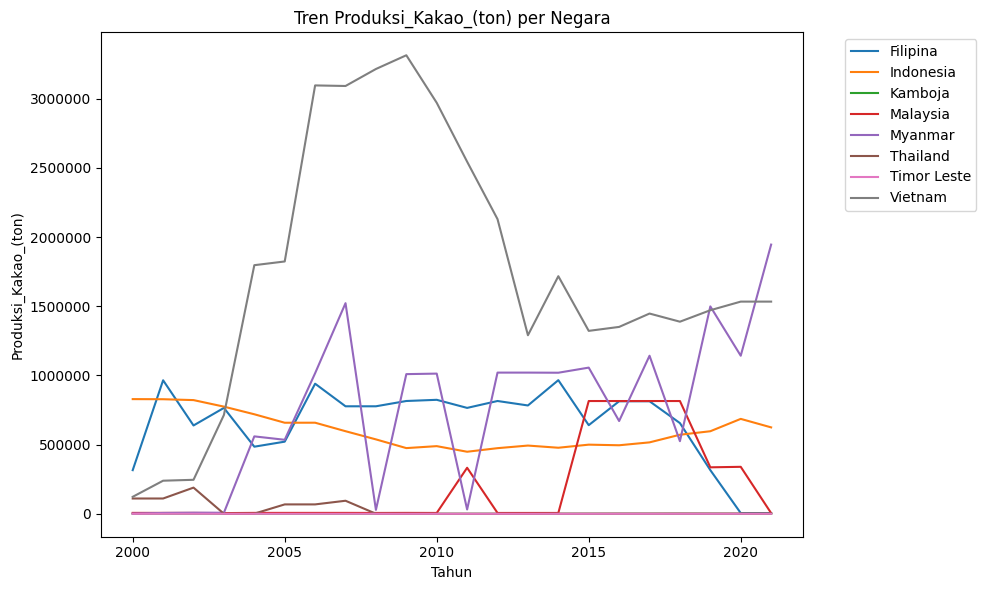

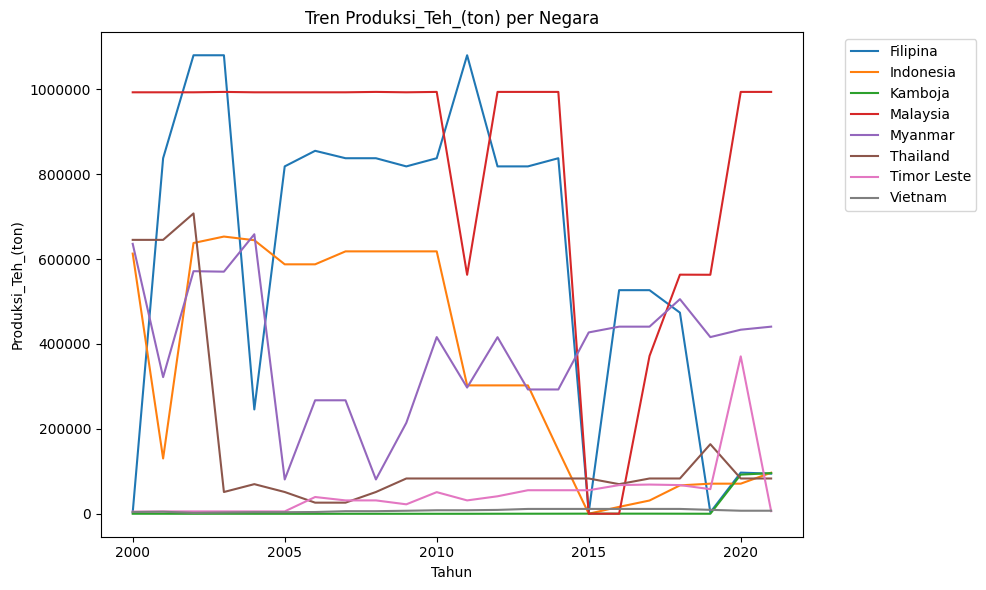

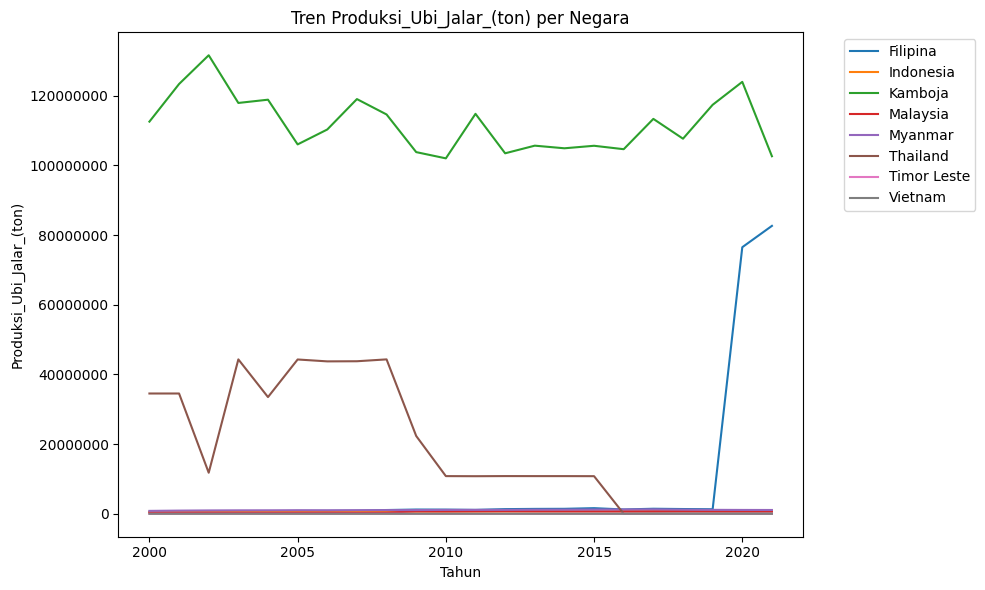

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

produksi_list = [
    'Produksi_Jagung_(ton)', 'Produksi_Beras_(ton)',
    'Produksi_Minyak_Sawit_(ton)', 'Produksi_Kopi_(ton)',
    'Produksi_Kakao_(ton)', 'Produksi_Teh_(ton)',
    'Produksi_Ubi_Jalar_(ton)'
]

with PdfPages('tren_produksi.pdf') as pdf:
    for var in produksi_list:
        plt.figure(figsize=(10, 6))
        sns.lineplot(
            data=DATA,
            x='Tahun',
            y=var,
            hue='Nama Negara'
        )
        plt.ticklabel_format(style='plain', axis='y')
        plt.title(f'Tren {var} per Negara')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        pdf.savefig()

# TRANSFORMASI DATA

In [ ]:
DATA_transformed = DATA[id_cols + num_cols].copy()

for c in num_cols:
    DATA_transformed[c] = np.log1p(DATA_transformed[c])

DATA_transformed.to_csv("DATA_TRANSFORMASI.csv", index=False)
DATA_transformed.head()


,Nama Negara,Kode Negara,Tahun,Luas_Lahan_Pertanian_%,Kalori_per_Kapita,Produksi_Jagung_(ton),Produksi_Beras_(ton),Produksi_Minyak_Sawit_(ton),Produksi_Kopi_(ton),Produksi_Kakao_(ton),Produksi_Teh_(ton),Produksi_Ubi_Jalar_(ton)
0,Filipina,PHL,2000,3.655232,7.755218,15.322053,14.198825,12.422899,13.370184,12.661854,8.186854,13.271738
22,Indonesia,IDN,2000,3.209405,7.764941,16.085263,18.954526,10.675571,9.467151,13.628068,13.325835,13.215218
44,Kamboja,KHM,2000,3.333005,7.637900,11.963829,11.295279,0.000000,8.987322,2.772589,5.602119,18.538924
66,Malaysia,MYS,2000,3.096444,7.971796,11.082158,15.751851,9.743683,7.696667,8.782783,13.808054,12.584910
88,Myanmar,MMR,2000,2.864698,7.622837,12.790802,11.006789,10.118639,13.414956,7.386595,13.362558,13.635012


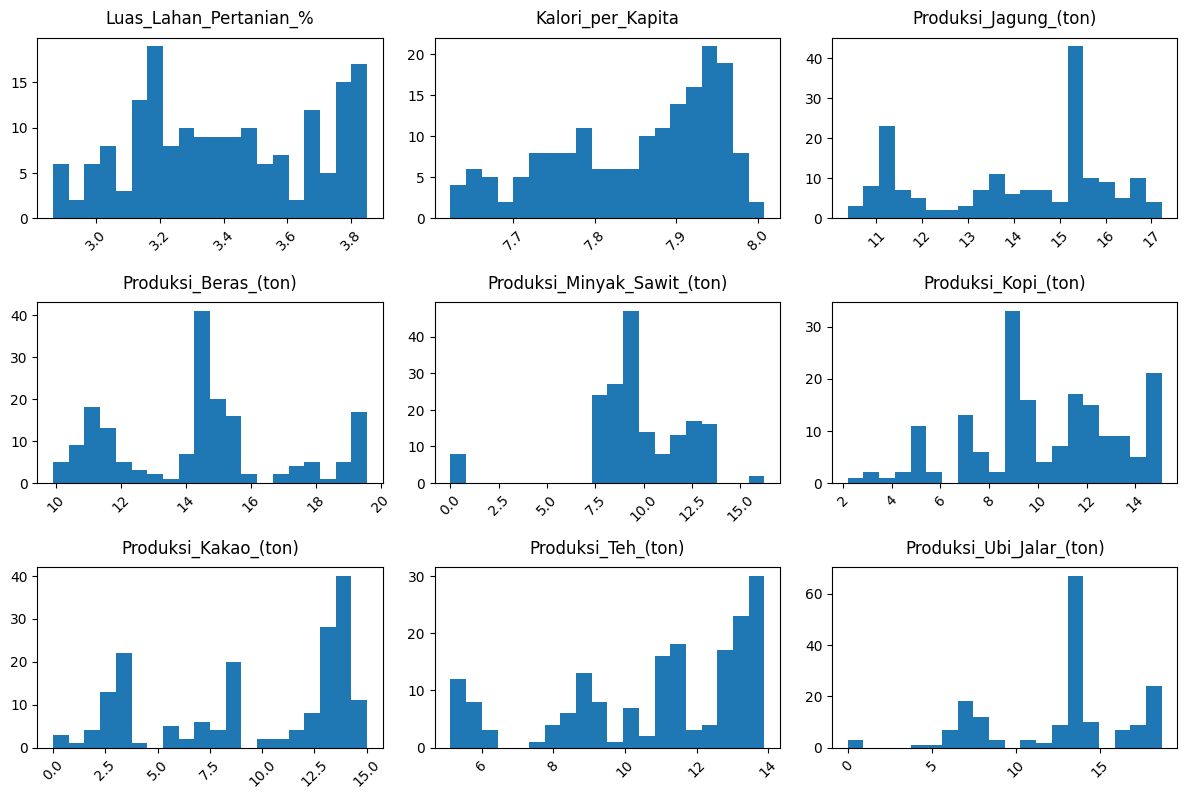

In [ ]:
#CEK DISTRIBUSI DATA SETELAH TRANSFORMASI
axes = DATA_transformed[num_cols].hist(bins=20, figsize=(12, 8))

for ax in axes.flatten():
    ax.set_title(ax.get_title(), pad=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

plt.tight_layout()
plt.show()

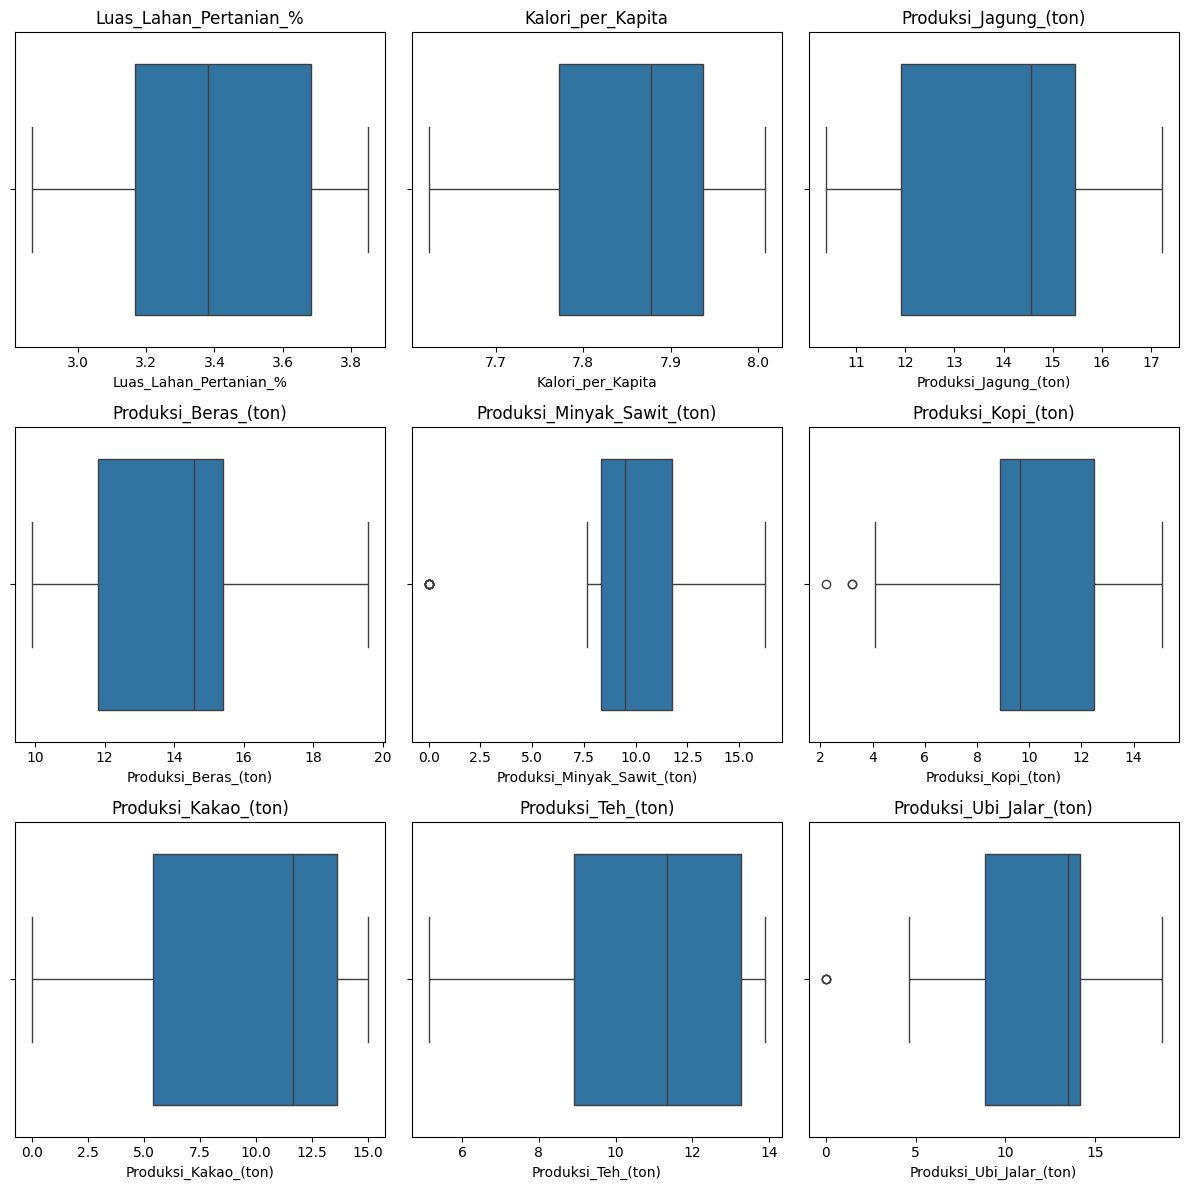

In [ ]:
#CEK OUTLIER DATA SETELAH TRANSFORMASI
plt.figure(figsize=(12, 4 * ((len(num_cols) + 2) // 3)))

for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 2) // 3, 3, i+1)
    sns.boxplot(x = DATA_transformed[col])
    plt.title(col)

plt.tight_layout()
plt.show()

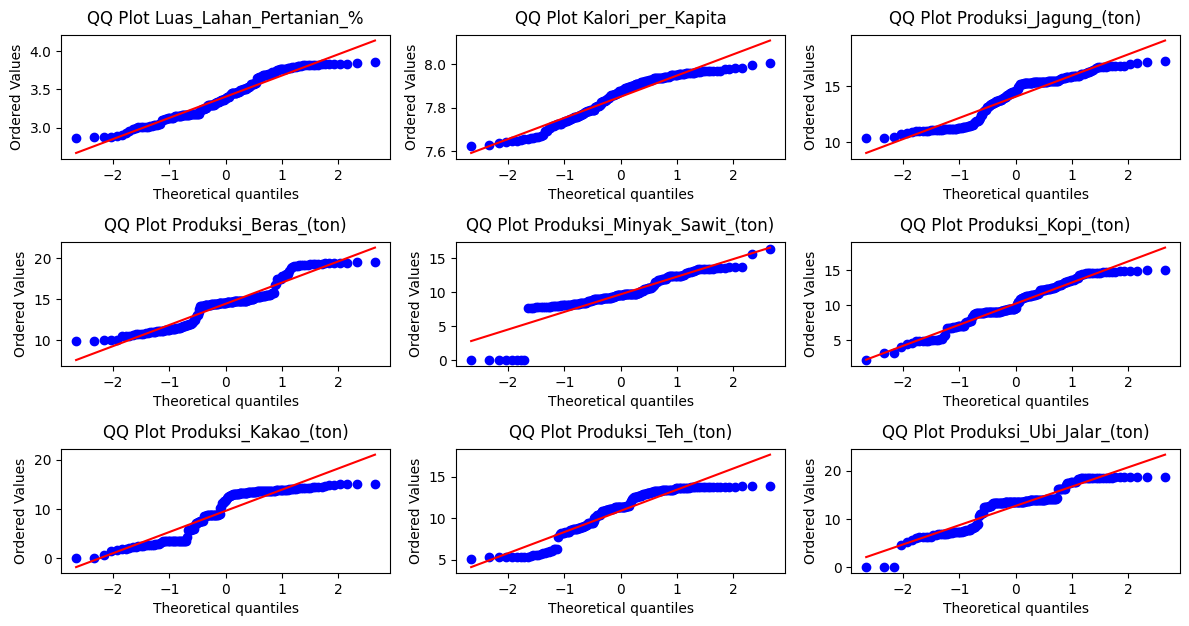

In [ ]:
n = len(num_cols)
rows = (n // 3) + 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    stats.probplot(DATA_transformed[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'QQ Plot {col}', pad=8)
    axes[i].grid(False)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# ANALISIS KORELASI

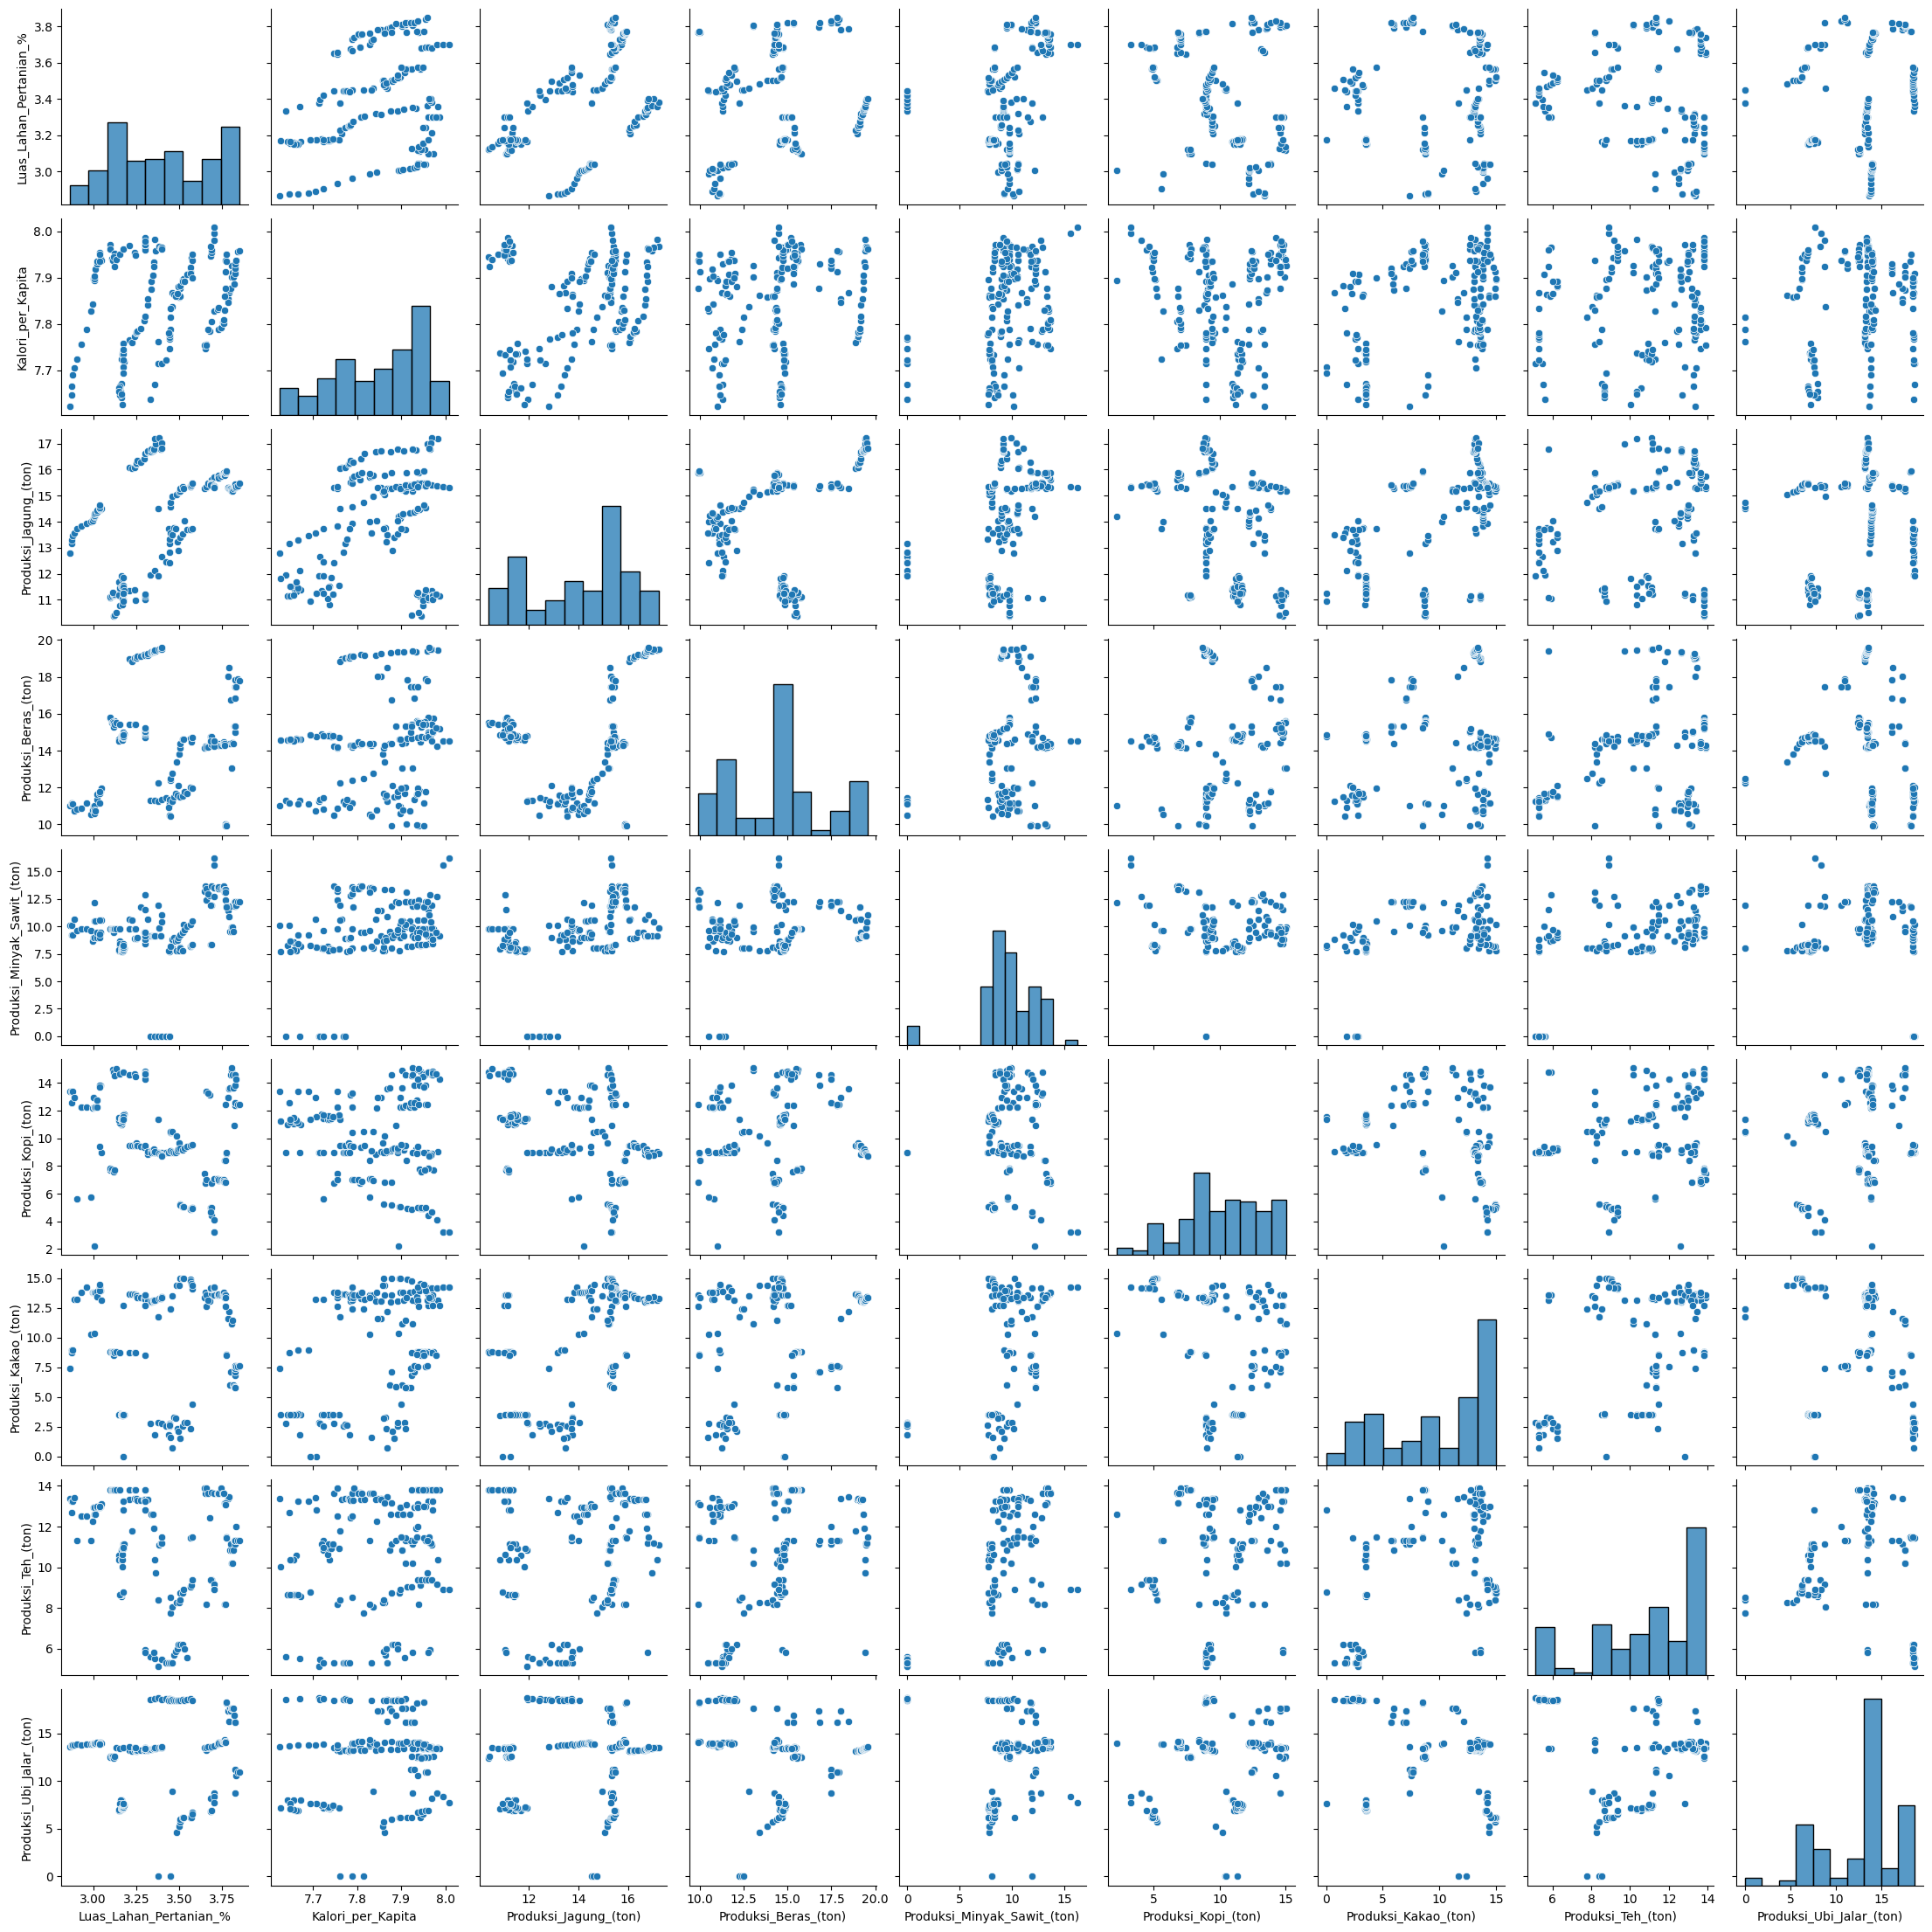

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.pairplot(DATA_transformed[num_cols])
plt.show()
plt.savefig('scatterplot_hubungan_variabel.pdf', format='pdf')


In [ ]:
korelasi_spearman = DATA_transformed[num_cols].corr(method='spearman')
korelasi_spearman.to_csv("KORELASI_SPEARMAN.csv", index=False)
korelasi_spearman

,Luas_Lahan_Pertanian_%,Kalori_per_Kapita,Produksi_Jagung_(ton),Produksi_Beras_(ton),Produksi_Minyak_Sawit_(ton),Produksi_Kopi_(ton),Produksi_Kakao_(ton),Produksi_Teh_(ton),Produksi_Ubi_Jalar_(ton)
Luas_Lahan_Pertanian_%,1.000000,0.221149,0.540925,0.093380,0.420745,-0.202419,0.022490,-0.196372,0.223771
Kalori_per_Kapita,0.221149,1.000000,0.161211,0.297552,0.333302,0.043384,0.361592,0.190894,0.014594
Produksi_Jagung_(ton),0.540925,0.161211,1.000000,0.205057,0.440757,-0.418418,0.490468,0.085242,0.081901
Produksi_Beras_(ton),0.093380,0.297552,0.205057,1.000000,0.078886,0.140887,0.035143,0.310096,-0.418975
Produksi_Minyak_Sawit_(ton),0.420745,0.333302,0.440757,0.078886,1.000000,-0.011617,0.328674,0.476963,0.246605
Produksi_Kopi_(ton),-0.202419,0.043384,-0.418418,0.140887,-0.011617,1.000000,-0.273532,0.199013,0.079541
Produksi_Kakao_(ton),0.022490,0.361592,0.490468,0.035143,0.328674,-0.273532,1.000000,0.308355,-0.285811
Produksi_Teh_(ton),-0.196372,0.190894,0.085242,0.310096,0.476963,0.199013,0.308355,1.000000,-0.007274
Produksi_Ubi_Jalar_(ton),0.223771,0.014594,0.081901,-0.418975,0.246605,0.079541,-0.285811,-0.007274,1.000000


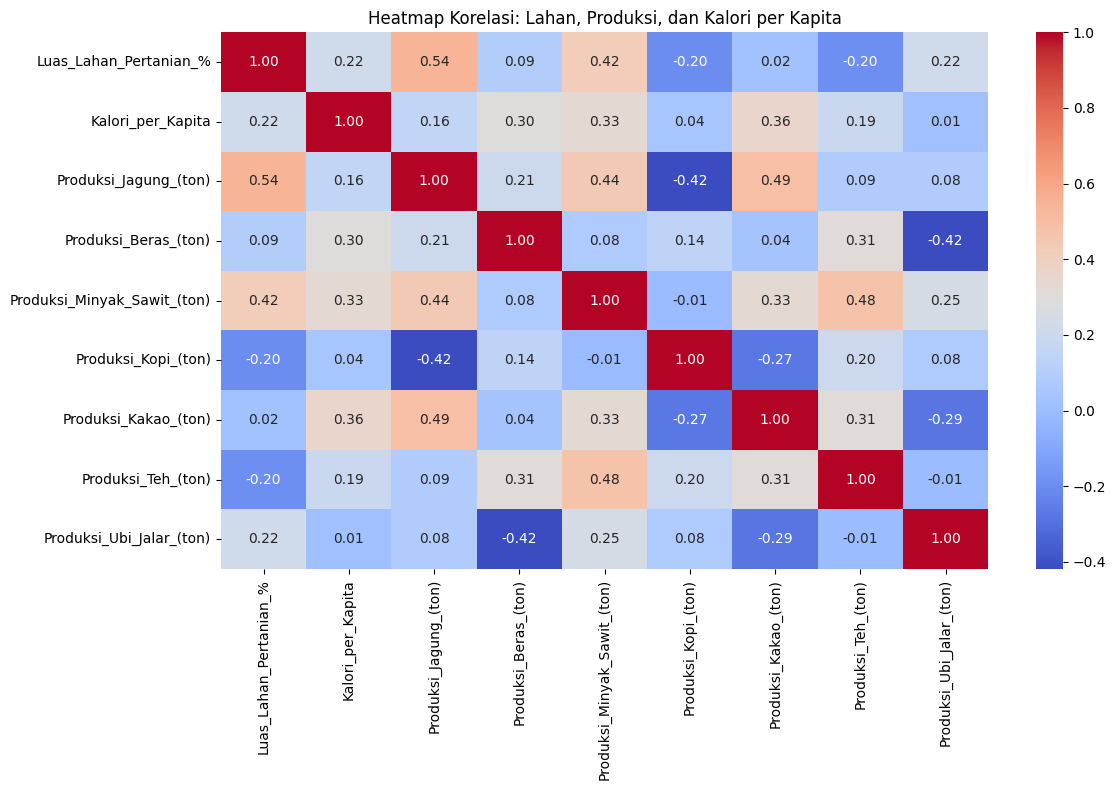

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(korelasi_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi: Lahan, Produksi, dan Kalori per Kapita")
plt.tight_layout()
plt.show()

# CLUSTERING MENGGUNAKAN K-MEANS

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## MEMBUAT VARIABEL TOTAL PRODUKSI

In [ ]:

data_cluster = DATA_transformed.copy()

In [ ]:

produksi_cols = [
    "Produksi_Jagung_(ton)", "Produksi_Beras_(ton)",
    "Produksi_Minyak_Sawit_(ton)", "Produksi_Kopi_(ton)",
    "Produksi_Kakao_(ton)", "Produksi_Teh_(ton)", "Produksi_Ubi_Jalar_(ton)"
]

data_cluster["Total_Produksi"] = data_cluster[produksi_cols].sum(axis=1)


## MENGHITUNG MEAN PER NEGARA

In [ ]:
data_mean = data_cluster.groupby("Nama Negara")[[
    "Luas_Lahan_Pertanian_%",
    "Kalori_per_Kapita",
    "Total_Produksi"
]].mean()

In [ ]:
data_mean

,Luas_Lahan_Pertanian_%,Kalori_per_Kapita,Total_Produksi
Nama Negara,,,
Filipina,3.722641,7.826371,90.370071
Indonesia,3.316439,7.867560,93.371204
Kamboja,3.463279,7.811676,66.570779
Malaysia,3.194736,7.956134,85.406158
Myanmar,2.975163,7.834560,85.445576
Thailand,3.814210,7.908359,90.960151
Timor Leste,3.166584,7.694590,66.239020
Vietnam,3.565802,7.905820,73.996025


## STANDARISASI DATA

In [ ]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(data_mean)

data_scaled = pd.DataFrame(
    scaled_values,
    columns=data_mean.columns,
    index=data_mean.index
)

In [ ]:
data_scaled

,Luas_Lahan_Pertanian_%,Kalori_per_Kapita,Total_Produksi
Nama Negara,,,
Filipina,1.178183,-0.325276,0.855166
Indonesia,-0.316052,0.226922,1.145978
Kamboja,0.224104,-0.522298,-1.450997
Malaysia,-0.763743,1.414409,0.374161
Myanmar,-1.571455,-0.215498,0.377980
Thailand,1.515023,0.773902,0.912345
Timor Leste,-0.867302,-2.092029,-1.483145
Vietnam,0.601242,0.739869,-0.731487


## METODE ELBOW

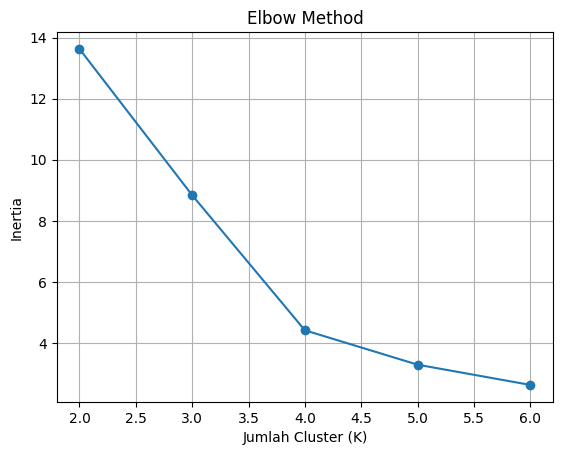

In [ ]:
inertia = []
K_range = range(2, 7)
X = data_scaled  # pastikan numerik semua

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## SILHOUETTE SCORE

In [ ]:
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"K={k}, Silhouette Score={score}")

K=2, Silhouette Score=0.2536060471920948
K=3, Silhouette Score=0.2934451405671265
K=4, Silhouette Score=0.28232256820524465
K=5, Silhouette Score=0.17884922577368065
K=6, Silhouette Score=0.06734960140356788


## K-MEANS

In [ ]:
kfinal = 3
kmeans = KMeans(n_clusters=kfinal, random_state=42)
labels = kmeans.fit_predict(X)
data_scaled["Cluster"] = labels

## LABEL CLUSTER

In [ ]:
cluster_mean = data_scaled.groupby("Cluster")[[
    "Luas_Lahan_Pertanian_%",
    "Kalori_per_Kapita",
    "Total_Produksi"
]].mean()

cluster_mean["Total"] = cluster_mean.sum(axis=1)
cluster_mean = cluster_mean.sort_values("Total")

urutan = cluster_mean.index.tolist()
mapping = {
    1: "Tinggi",
    2: "Sedang",
    0: "Rendah"}

# Terapkan mapping
data_scaled["Kategori"] = data_scaled["Cluster"].map(mapping)


data_scaled["Kategori"] = data_scaled["Cluster"].map(mapping)


## HASIL CLUSTERING MENGGUNAKAN K-MEANS

In [ ]:
hasil = data_scaled.copy()
hasil.to_csv("HASIL_CLUSTER_FINAL.csv")

print("\nHASIL CLUSTER PER NEGARA")
print(hasil[["Cluster", "Kategori"]])


HASIL CLUSTER PER NEGARA
             Cluster Kategori
Nama Negara                  
Filipina           1   Tinggi
Indonesia          2   Sedang
Kamboja            0   Rendah
Malaysia           2   Sedang
Myanmar            2   Sedang
Thailand           1   Tinggi
Timor Leste        0   Rendah
Vietnam            0   Rendah


## VISUALISASI HASIL CLUSTERING

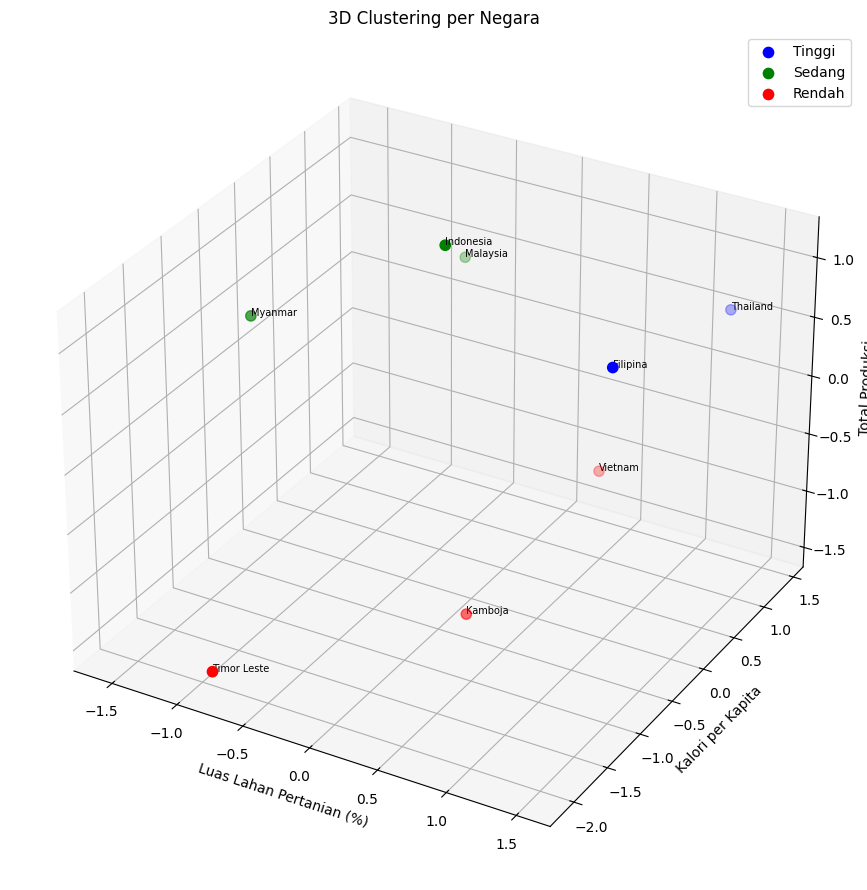

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 9))
ax = fig.add_subplot(111, projection='3d')

colors = {"Rendah": "red", "Sedang": "green", "Tinggi": "blue"}

for k in data_scaled["Kategori"].unique():
    subset = data_scaled[data_scaled["Kategori"] == k]
    ax.scatter(
        subset["Luas_Lahan_Pertanian_%"],
        subset["Kalori_per_Kapita"],
        subset["Total_Produksi"],
        label=k,
        s=55,
        c=colors[k]
    )
    for idx, row in subset.iterrows():
        ax.text(
            row["Luas_Lahan_Pertanian_%"],
            row["Kalori_per_Kapita"],
            row["Total_Produksi"],
            str(idx),
            fontsize=7
        )

ax.set_xlabel("Luas Lahan Pertanian (%)")
ax.set_ylabel("Kalori per Kapita")
ax.set_zlabel("Total Produksi")
ax.set_title("3D Clustering per Negara")

ax.legend()
plt.tight_layout()
plt.show()
